In [73]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [74]:
# Reading file
data_train = pd.read_csv('Train_data.csv')
data_test = pd.read_csv('test_data.csv')


In [75]:
# Concatination of the data
df = pd.concat([data_train,data_test],axis = 0)
df.head().T

,0,1,2,3,4
Glucose,0.739597,0.121786,0.452539,0.136609,0.176737
Cholesterol,0.650198,0.023058,0.116135,0.015605,0.75222
Hemoglobin,0.713631,0.944893,0.54456,0.419957,0.971779
Platelets,0.868491,0.905372,0.40064,0.191487,0.785286
White Blood Cells,0.687433,0.507711,0.294538,0.081168,0.44388
Red Blood Cells,0.529895,0.403033,0.382021,0.166214,0.439851
Hematocrit,0.290006,0.164216,0.625267,0.073293,0.894991
Mean Corpuscular Volume,0.631045,0.307553,0.295122,0.668719,0.442159
Mean Corpuscular Hemoglobin,0.001328,0.207938,0.868369,0.125447,0.257288
Mean Corpuscular Hemoglobin Concentration,0.795829,0.505562,0.026808,0.501051,0.805987


##Applying EDA for the data

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2837 entries, 0 to 485
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2837 non-null   float64
 1   Cholesterol                                2837 non-null   float64
 2   Hemoglobin                                 2837 non-null   float64
 3   Platelets                                  2837 non-null   float64
 4   White Blood Cells                          2837 non-null   float64
 5   Red Blood Cells                            2837 non-null   float64
 6   Hematocrit                                 2837 non-null   float64
 7   Mean Corpuscular Volume                    2837 non-null   float64
 8   Mean Corpuscular Hemoglobin                2837 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2837 non-null   float64
 10  Insulin                       

In [77]:
df.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,...,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000
mean,0.384621,0.413031,0.568941,0.508157,0.510863,0.506205,0.506106,0.496309,0.488859,0.551795,...,0.395643,0.447721,0.435470,0.536118,0.446217,0.460282,0.567101,0.440572,0.464101,0.445221
std,0.262080,0.251023,0.278908,0.301621,0.279597,0.273070,0.287049,0.276560,0.310724,0.277234,...,0.266795,0.269223,0.260077,0.274450,0.271631,0.253810,0.260580,0.242565,0.259814,0.254098
min,0.001827,0.003088,0.000719,0.000006,-0.000206,0.000552,0.004556,0.000309,-0.000614,0.000719,...,0.001885,-0.000991,0.001036,-0.000546,-0.000312,0.002047,0.002145,0.008831,0.005714,-0.000991
25%,0.141529,0.223545,0.325035,0.202496,0.259467,0.258357,0.288132,0.287532,0.217207,0.319725,...,0.189918,0.188792,0.231304,0.296264,0.214581,0.239659,0.335346,0.214560,0.288961,0.199513
50%,0.357817,0.397638,0.597916,0.533962,0.527381,0.467431,0.493428,0.461418,0.448926,0.583470,...,0.335778,0.466375,0.424560,0.512941,0.389440,0.486317,0.599542,0.428713,0.465957,0.489070
75%,0.596150,0.603341,0.791215,0.771727,0.744950,0.743670,0.753657,0.722293,0.778160,0.741381,...,0.597671,0.670665,0.619900,0.779378,0.715823,0.620868,0.800666,0.645247,0.684140,0.633088
max,0.991742,0.999606,0.997876,0.999507,0.999646,1.000000,1.000857,0.996362,0.999234,0.999666,...,0.999826,0.999265,0.999567,1.000744,1.000326,1.000402,0.999857,0.999348,1.000125,0.999488


In [78]:
df.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [79]:
# Converting the target to be numerical
encoder = LabelEncoder()
df['Disease'] = encoder.fit_transform(df['Disease'])

In [80]:
df['Disease'].count()

2837

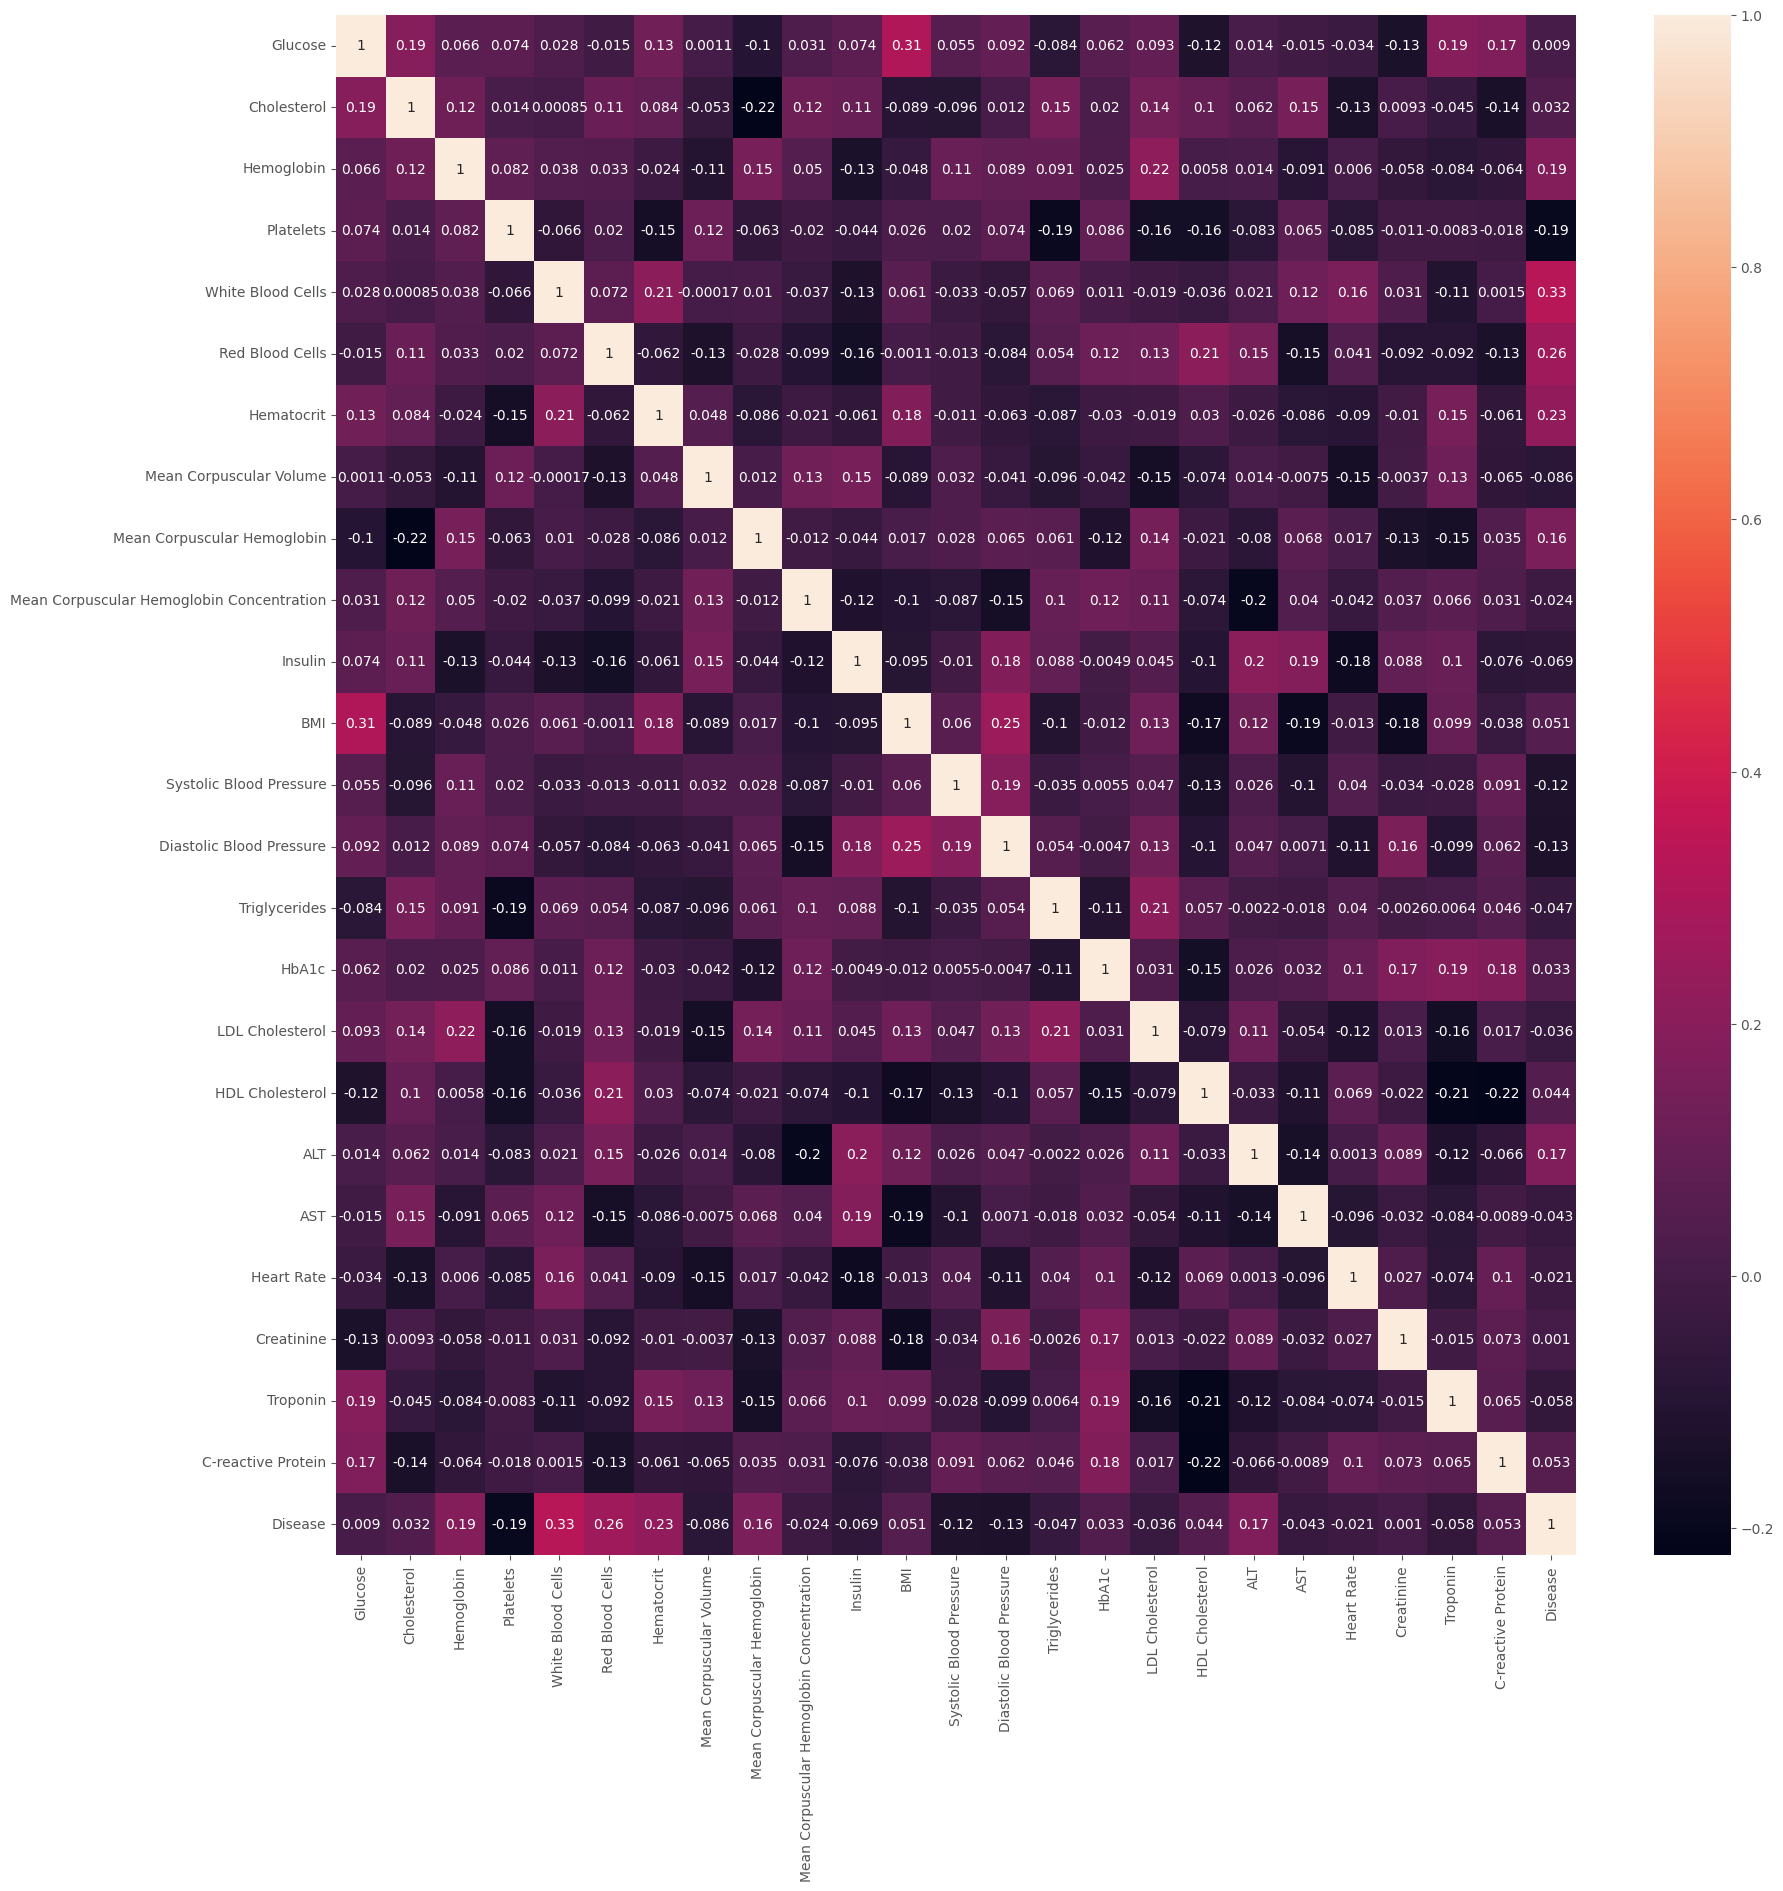

In [81]:
# Plotting heatmap to find correlation between input features to prevent overfitting
plt.figure(figsize=(20,20))
cor= df.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [82]:
# Splitting the data
x = df.drop('Disease',axis = 1)
y = df['Disease']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

##Making the model with different algorithms

In [83]:
models = {
    "naive_bayes": GaussianNB(),
    "logistic_regression": LogisticRegression(max_iter=1000),
    "random_forest": RandomForestClassifier(),
    "support_vector_machine": SVC()
}

def fit_and_evaluate(models, X_train, X_test, y_train, y_test):
    # Set a random seed for reproducibility
    np.random.seed(42)

    model_evaluations = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        model_evaluations[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }

    return model_evaluations

model_evaluations = fit_and_evaluate(models, x_train, x_test, y_train, y_test)
print(model_evaluations)


{'naive_bayes': {'Accuracy': 0.8345070422535211, 'Precision': 0.8239302823316728, 'Recall': 0.8345070422535211, 'F1 Score': 0.8283816729151728}, 'logistic_regression': {'Accuracy': 0.8186619718309859, 'Precision': 0.8114438291904118, 'Recall': 0.8186619718309859, 'F1 Score': 0.8124768590147958}, 'random_forest': {'Accuracy': 0.9577464788732394, 'Precision': 0.9630837657524092, 'Recall': 0.9577464788732394, 'F1 Score': 0.9537316191454505}, 'support_vector_machine': {'Accuracy': 0.9471830985915493, 'Precision': 0.9378664583089038, 'Recall': 0.9471830985915493, 'F1 Score': 0.9408580063443067}}


##Visiualizing the output model performance

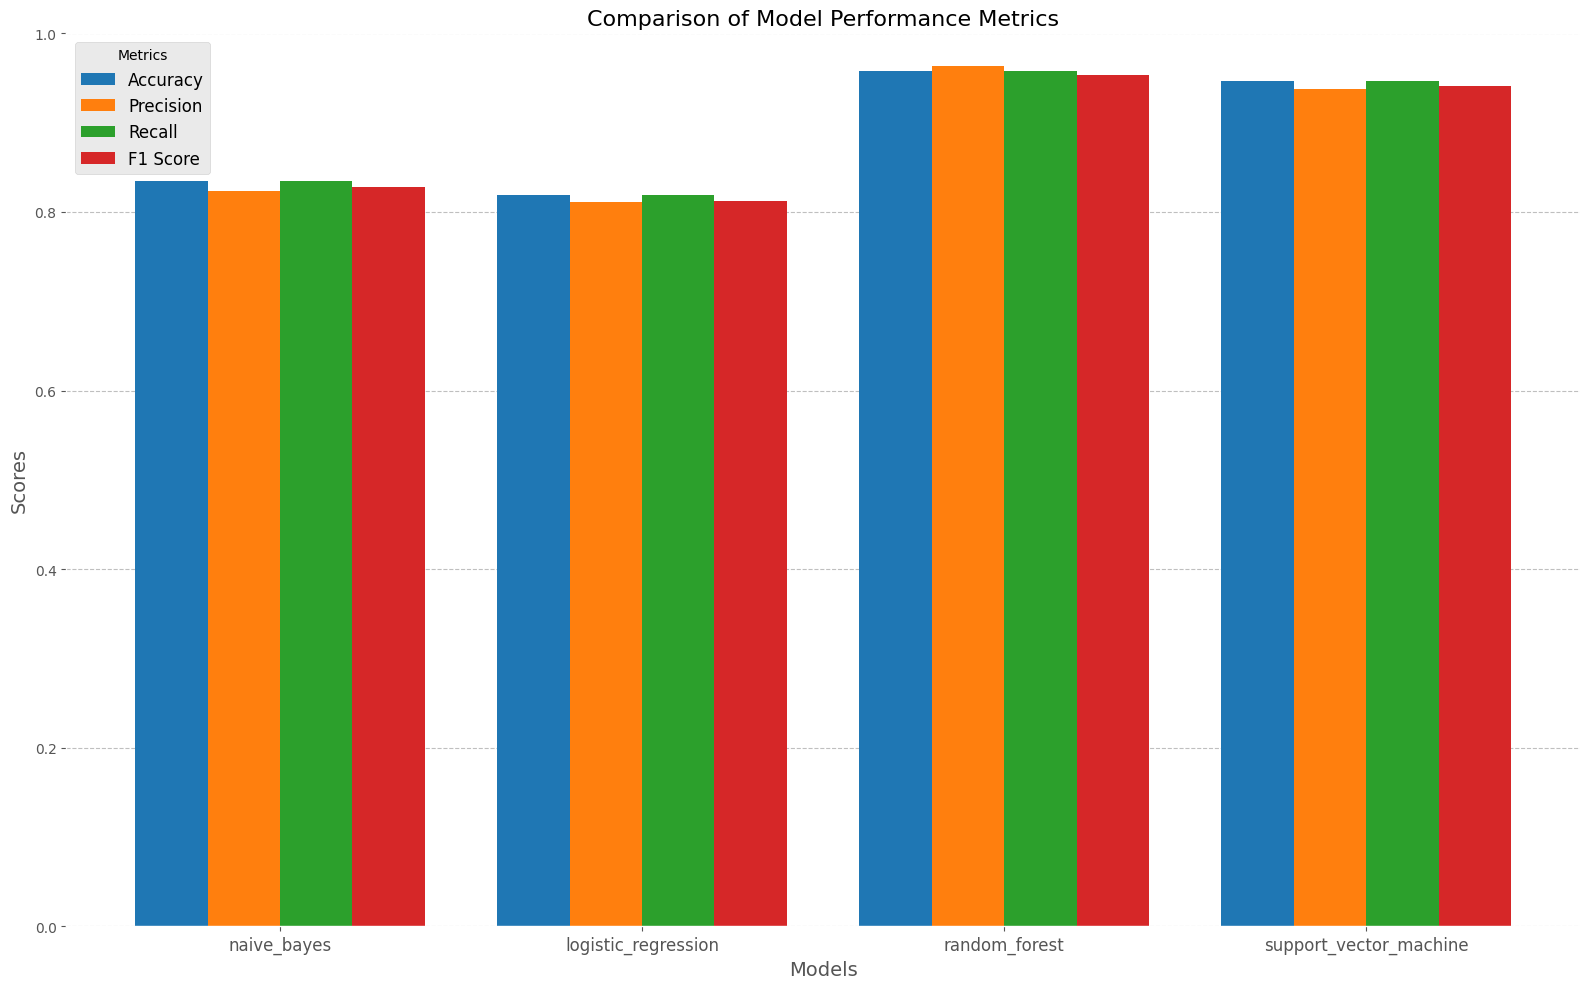

In [84]:

df = pd.DataFrame(model_evaluations).T

# Setting up the plot with a custom style
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(16, 10))
width = 0.2
x = np.arange(len(df.index))

# Custom colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plotting each metric with custom colors
for i, metric in enumerate(df.columns):
    ax.bar(x + i * width, df[metric], width, label=metric, color=colors[i])

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Comparison of Model Performance Metrics', fontsize=16)
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(df.index, fontsize=12)
ax.set_ylim(0, 1)
ax.legend(title="Metrics", fontsize=12)

# Adding grid lines for better readability
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)

# Setting the background color
fig.set_facecolor('white')
ax.set_facecolor('white')

fig.tight_layout()
plt.show()
